# Evaluating Gene Correlations

This plots the result of the gene correlation analyis

In [1]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Path="/home/mgander/moscot-framework_reproducibility/data/mouse_temporal"
ts=['E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25', 'E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25', 'E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5', 'E13.5']

In [3]:
DF0=pd.read_pickle(f'{Path}/Validation_output/E7.0_DE.npy')
DF1=pd.read_pickle(f'{Path}/Validation_output/E7.75_Allantois.npy')
DF2=pd.read_pickle(f'{Path}/Validation_output/E8.0_FHF.npy')
DF3=pd.read_pickle(f'{Path}/Validation_output/E10.5_PE.npy')

DF0['Cell type']='Definitive     \n Endoderm    \n(E7.0 to E7.25) '
DF1['Cell type']='Allatnois       \n(E8.0 to E8.25) '
DF2['Cell type']='First heart field \n(E8.0 to E8.25) '   
DF3['Cell type']='Pancreatic     \nepithelium    \n(E10.5 to E11.5)'

In [4]:
DF=pd.concat([DF0, DF1, DF2, DF3])
DF['order']=[1 if a=='TOME' else 0 for a in DF['Method']]
DF['day']=[float(a[1:]) for a in DF['Timepoint']]
DF=DF.sort_values('order')
DF=DF.sort_values('day')

In [5]:
import mplscience
mplscience.set_style(reset_current=True)

pal=sns.color_palette()
paln=pal.copy()
paln[0]=np.array([13,111,178])/255

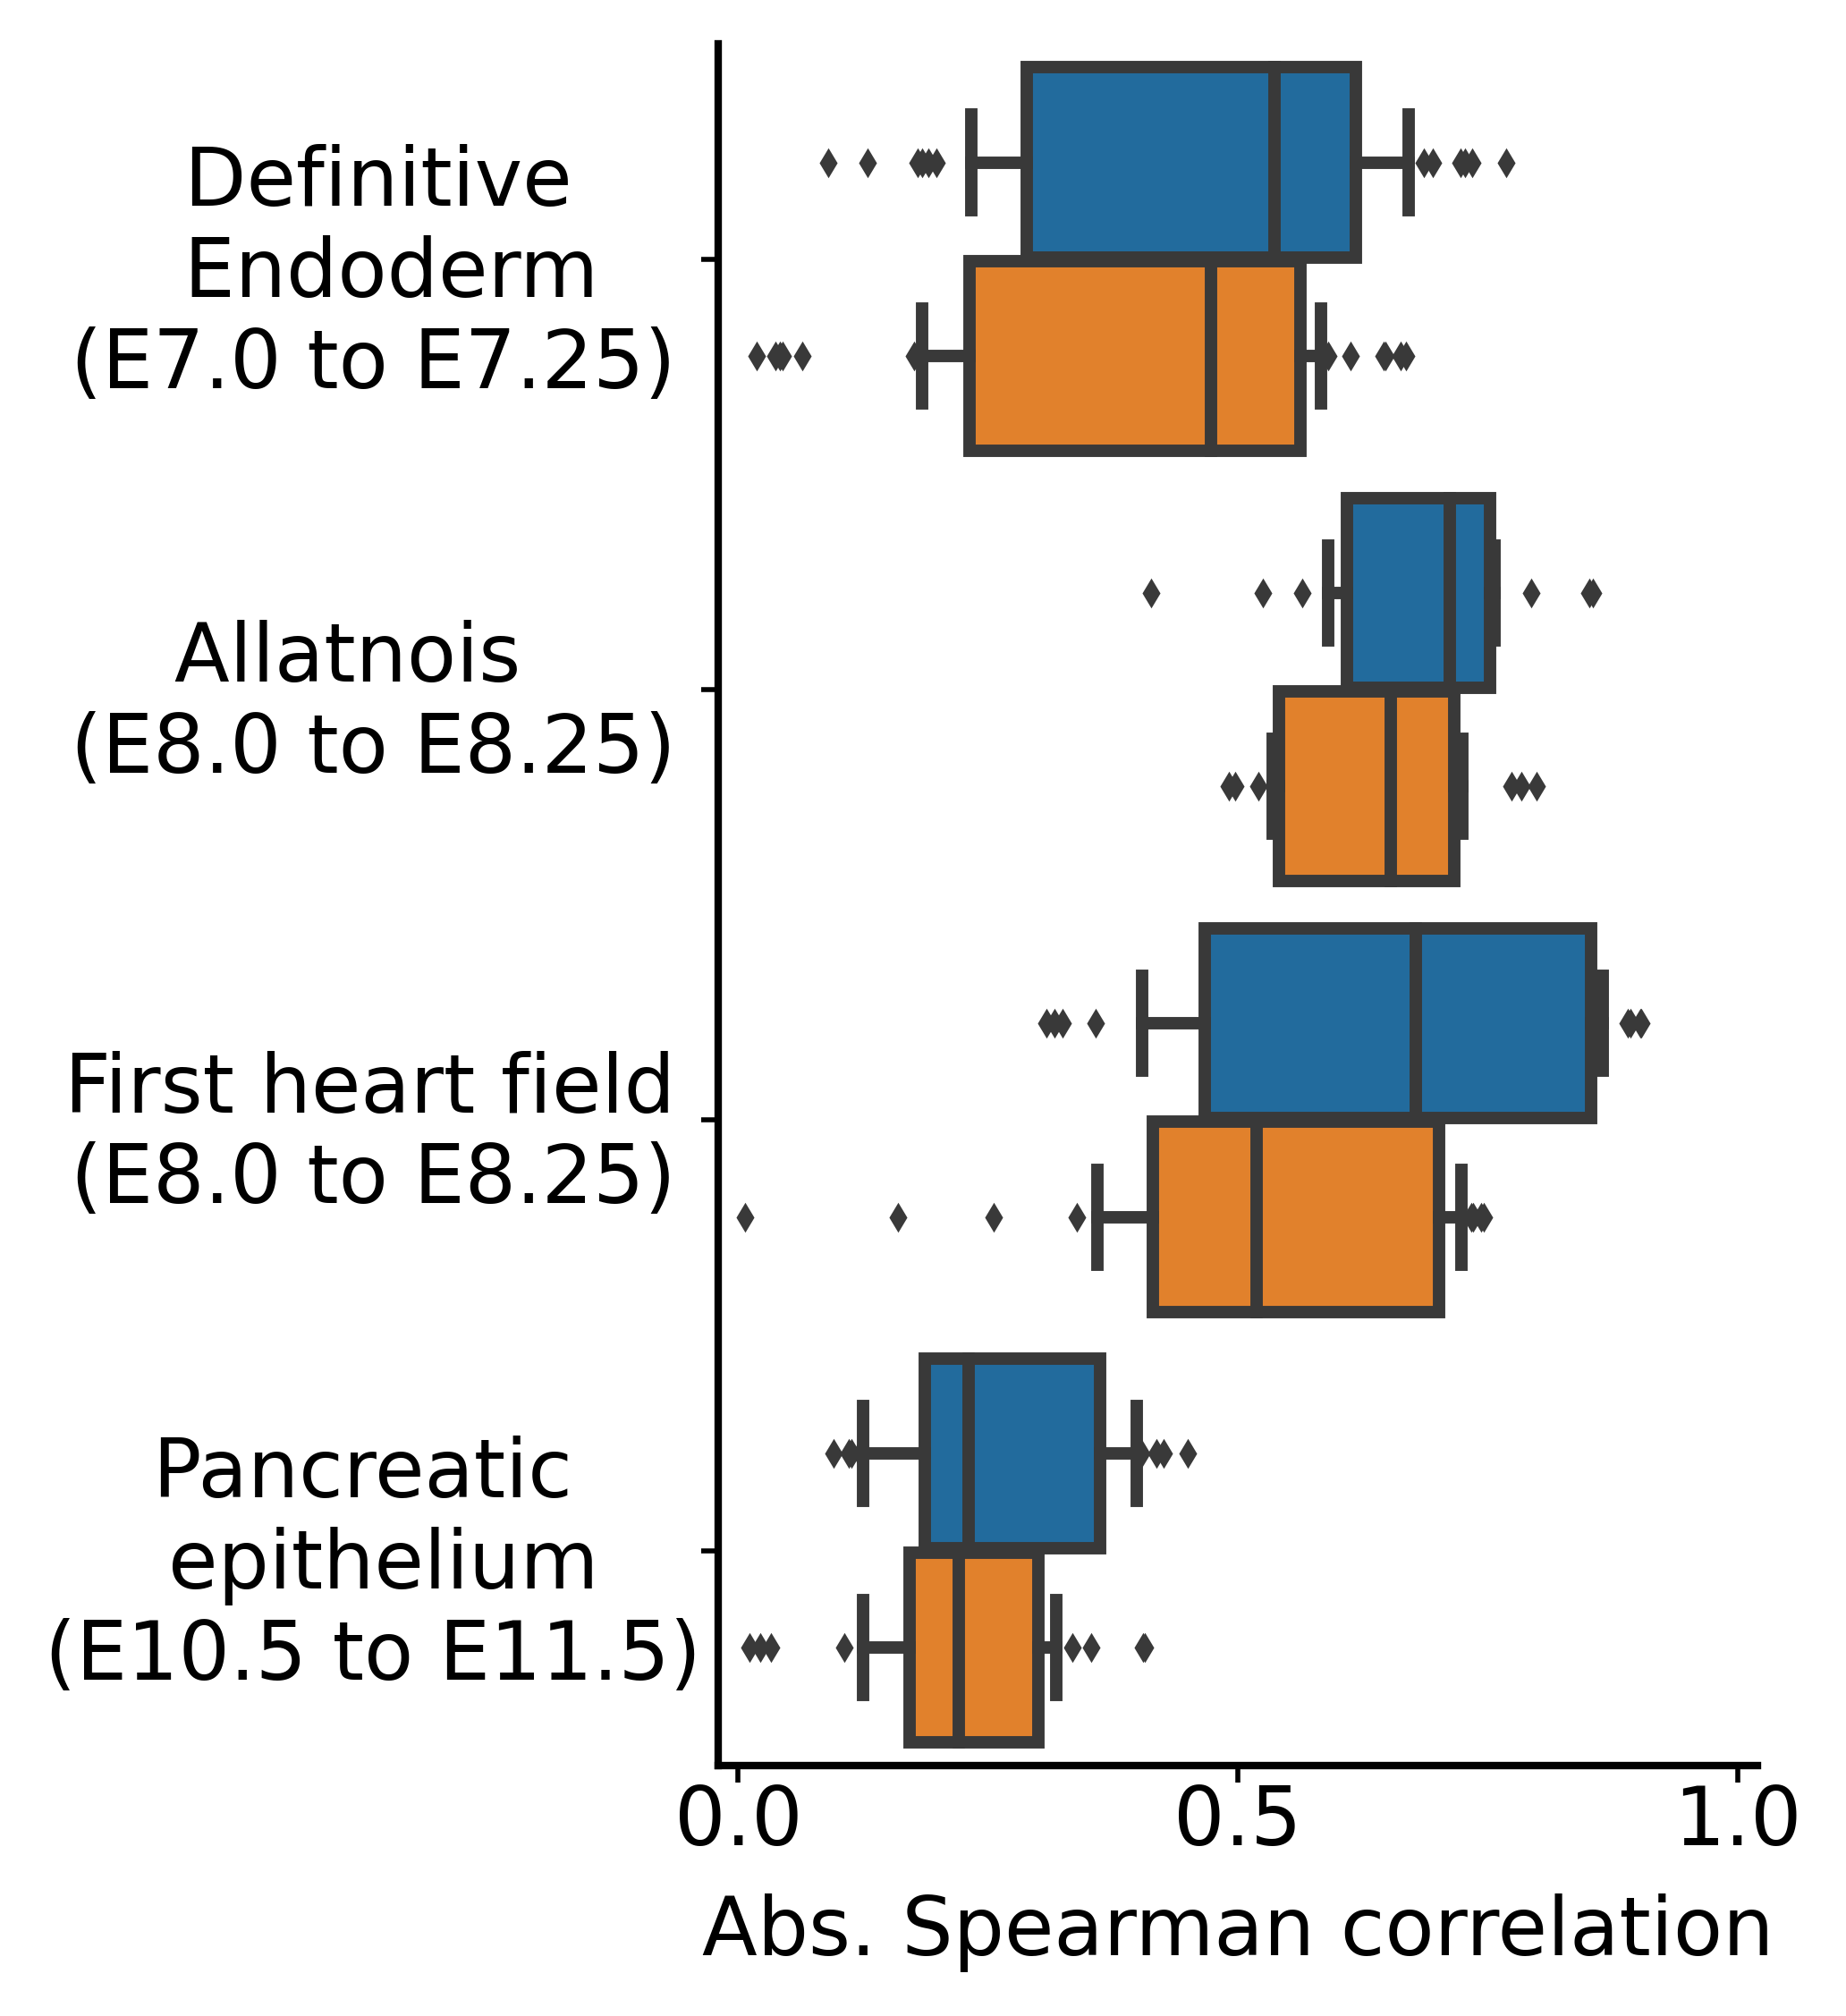

In [6]:
fontsize=13

fig, ax = plt.subplots(ncols=1, figsize=(3, 5), dpi=500)
g1=sns.boxplot(data=DF, x="Abs. Correlation", y="Cell type", hue='Method', showfliers=True,
               showmeans=False,  whis=[15,85], ax=ax, palette=paln, linewidth = 2, fliersize=2,
               width=0.9)
plt.ylabel('', fontsize=fontsize)

ax.tick_params(axis='x', pad=0)
ax.tick_params(axis='y', pad=0)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize, rotation=0)
plt.xlim(-0.02,1.02)

plt.xlabel('Abs. Spearman correlation', fontsize=fontsize, labelpad=5)
#g1.legend(fontsize=12, loc='lower right')
#g1.legend(fontsize=fontsize, loc='lower right')

#sns.move_legend(obj=g1, loc=(0.6,0.05), ncol=1, title_fontsize=fontsize, title_weight='bold', fontsize=fontsize,
#               fancybox=True, frameon=True)
g1.legend_.remove()
plt.show()